In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../data/census.csv")
# Print a summary of the fields
print("\nSummary of the fields:")
print(df.info())

# Display the first few rows
print("\nFirst rows of the data:")
df.head()


Summary of the fields:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlgt           32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

First rows of the data:


,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.describe()

,age,fnlgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
def check_data_issues(data):
    try:
        # Check for missing values
        print("\nMissing values:")
        print(data.isnull().sum())

        # Check for inconsistent data types
        print("\nData types:")
        print(data.dtypes)

        # Check for unexpected unique values in categorical columns
        print("\nUnique values in categorical columns:")
        for col in data.select_dtypes(include=['object']).columns:
            print(f"{col}: {data[col].nunique()} unique values")
    except Exception as e:
        print(f"An error occurred during data issue checks: {e}")

In [5]:
check_data_issues(df)


Missing values:
age                0
 workclass         0
 fnlgt             0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

Data types:
age                 int64
 workclass         object
 fnlgt              int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 salary            object
dtype: object

Unique values in categorical columns:
 workclass: 9 unique values
 education: 16 unique values
 marital-status: 7 unique values
 occupation: 15 unique values
 relationship: 6 unique values
 race: 5 unique values
 sex: 2 unique values
 na

In [6]:
df.loc[0, " marital-status"]

' Never-married'

### Data Cleaning

In [7]:
def clean_data(data):
    try:
        # Strip leading and trailing spaces from all string columns
        for col in data.select_dtypes(include=['object']).columns:
            data[col] = data[col].str.strip()
        data.columns = data.columns.str.strip()
    except Exception as e:
        print(f"An error occurred during data cleaning: {e}")
    return data
    

In [8]:
cleaned_df = clean_data(df)

In [9]:
cleaned_df.loc[0, "marital-status"]

'Never-married'

In [10]:
cleaned_df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
cleaned_df.to_csv("../../data/clean_census.csv", index=False)

### Performing EDA

In [2]:
#loading clean data (to load if we begin here)
df = pd.read_csv("../../data/clean_census.csv")
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
from ydata_profiling import ProfileReport

In [4]:
profile = ProfileReport(df, title="Profiling Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [3]:
target_col_name = "salary"
cat_col_names = [
    "workclass", 
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country"
]
num_col_names = [
    "fnlgt",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week"
]

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

def make_cat_plot(data, col_name):
    plt.figure(figsize=(20,10)) 
    data[col_name].value_counts('normalize').plot(kind='bar')

def make_num_plot(data, col_name):
    plt.figure(figsize=(20,10)) 
    sns.histplot(data[col_name], stat='density', kde=True)

def make_correlation_matrix(data):
    encoded_data = data.copy()
    for col in encoded_data.select_dtypes(include=['object']).columns:
        encoded_data[col] = encoded_data[col].astype('category').cat.codes
    plt.figure(figsize=(20,10)) 
    sns.heatmap(encoded_data.corr(), annot=False, cmap='Dark2_r', linewidths = 2)

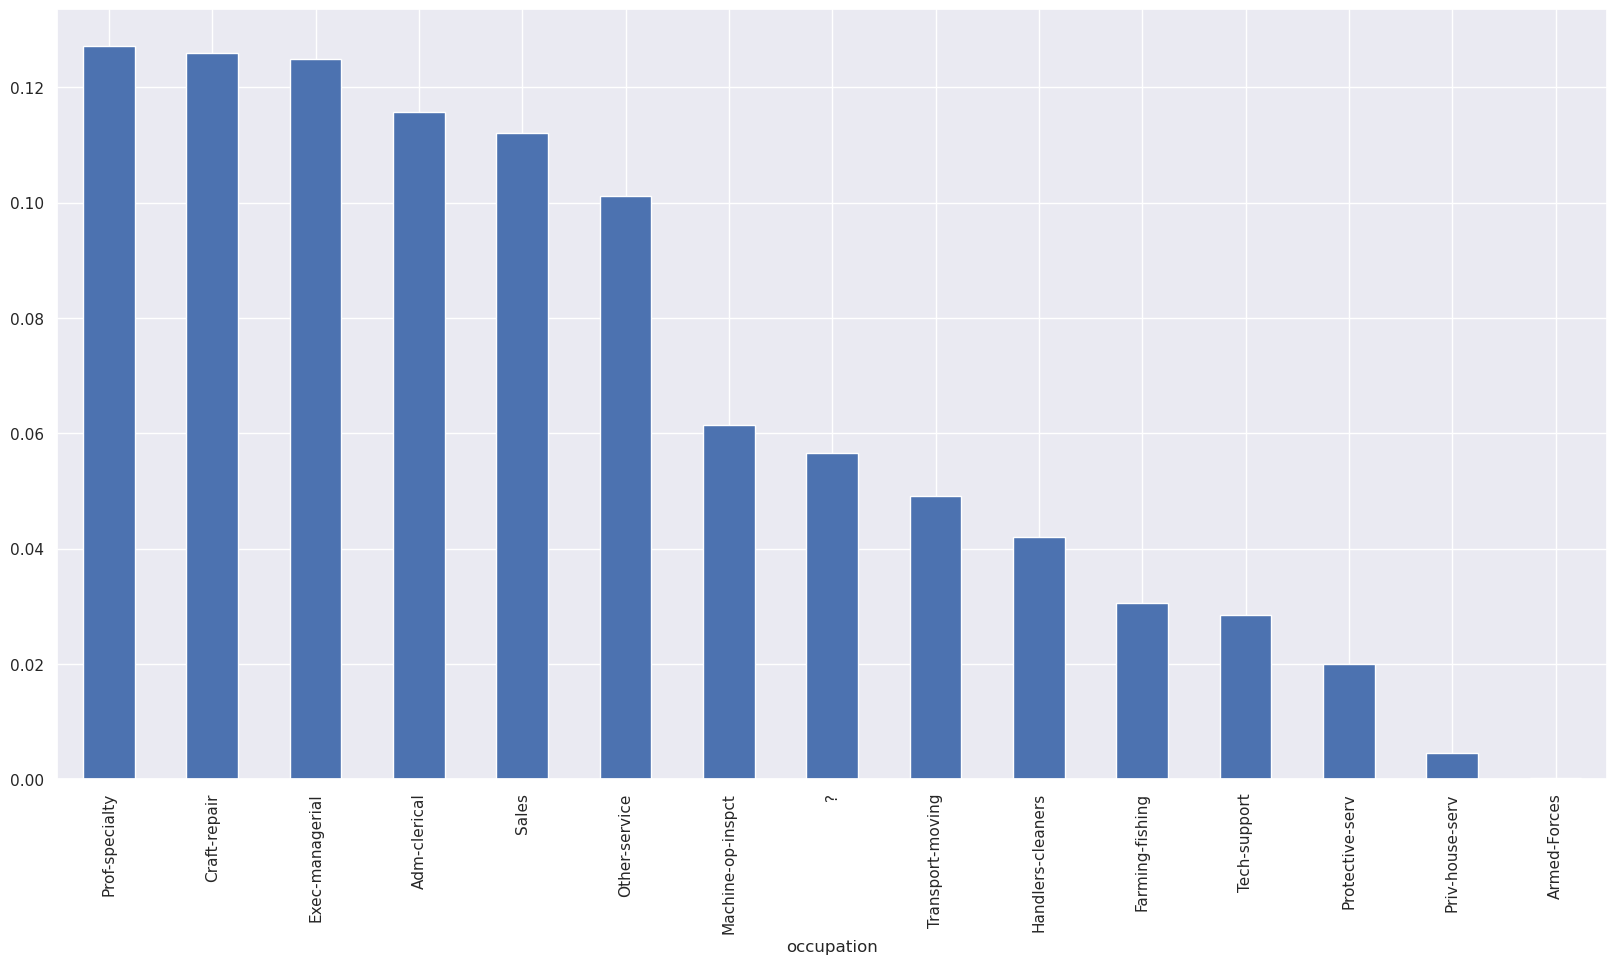

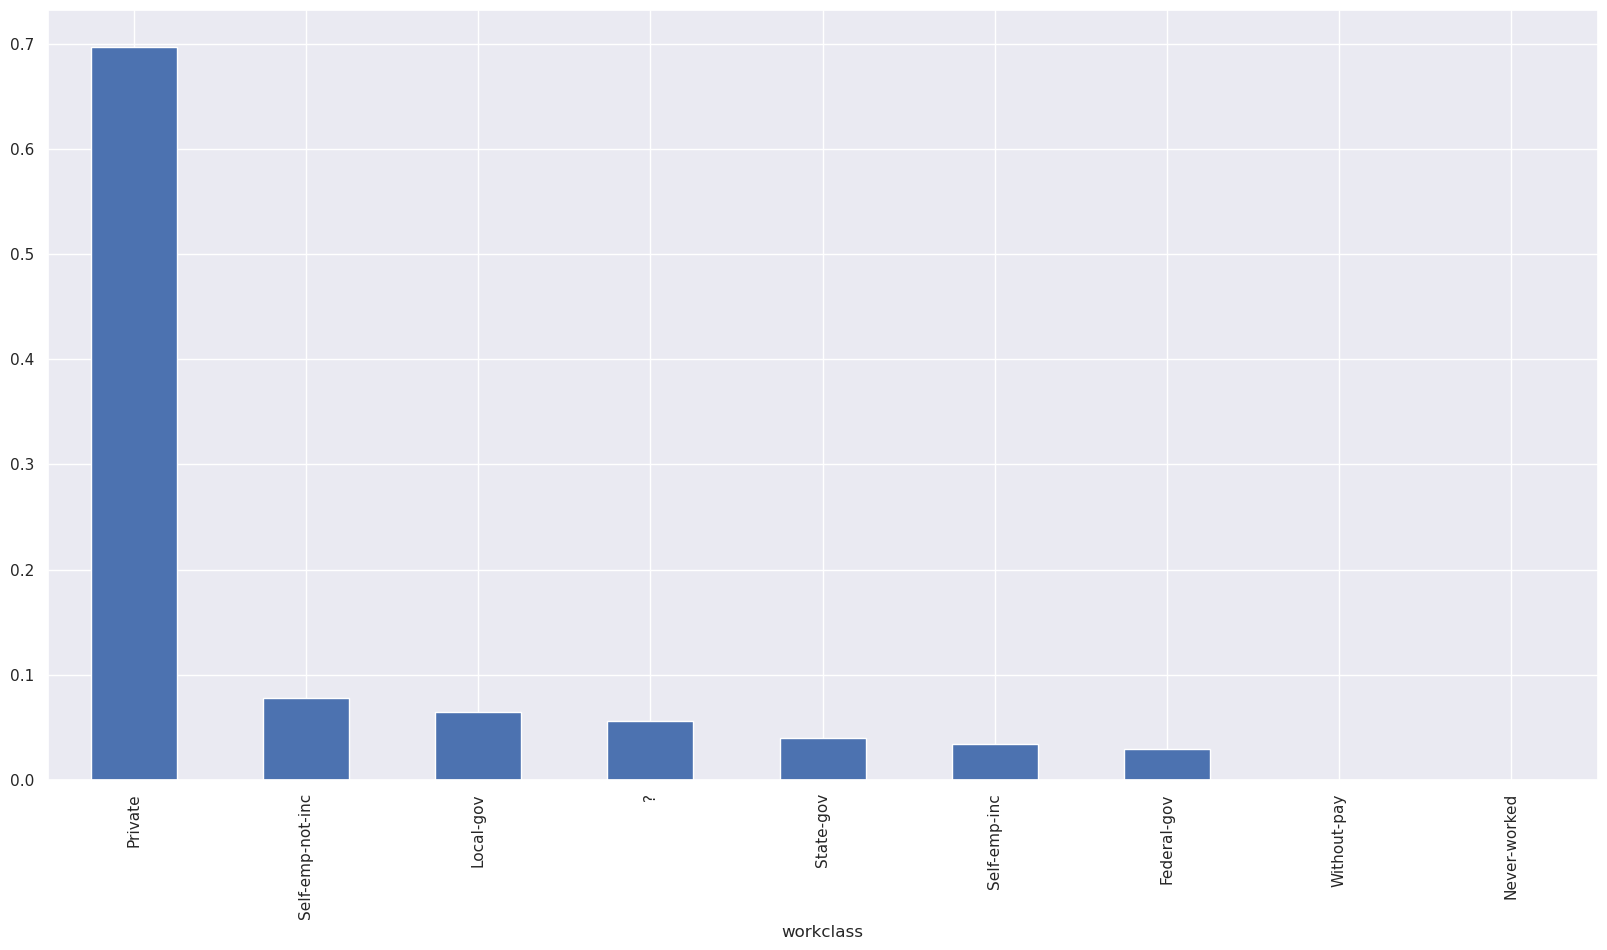

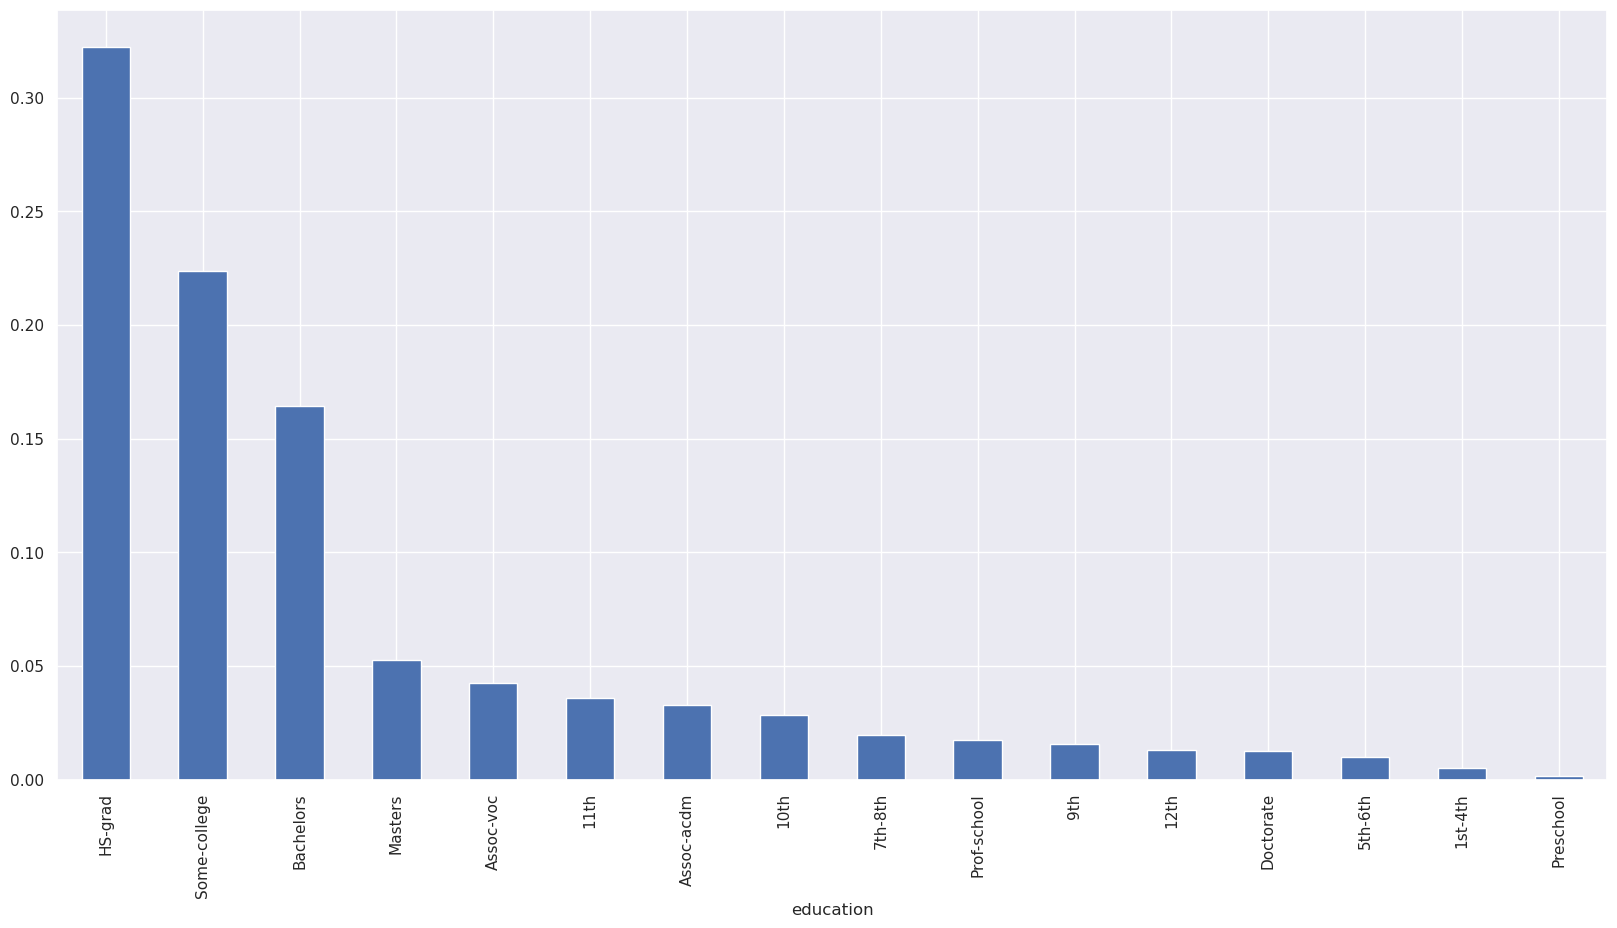

In [5]:
make_cat_plot(df, "occupation")
make_cat_plot(df, "workclass")
make_cat_plot(df, "education")

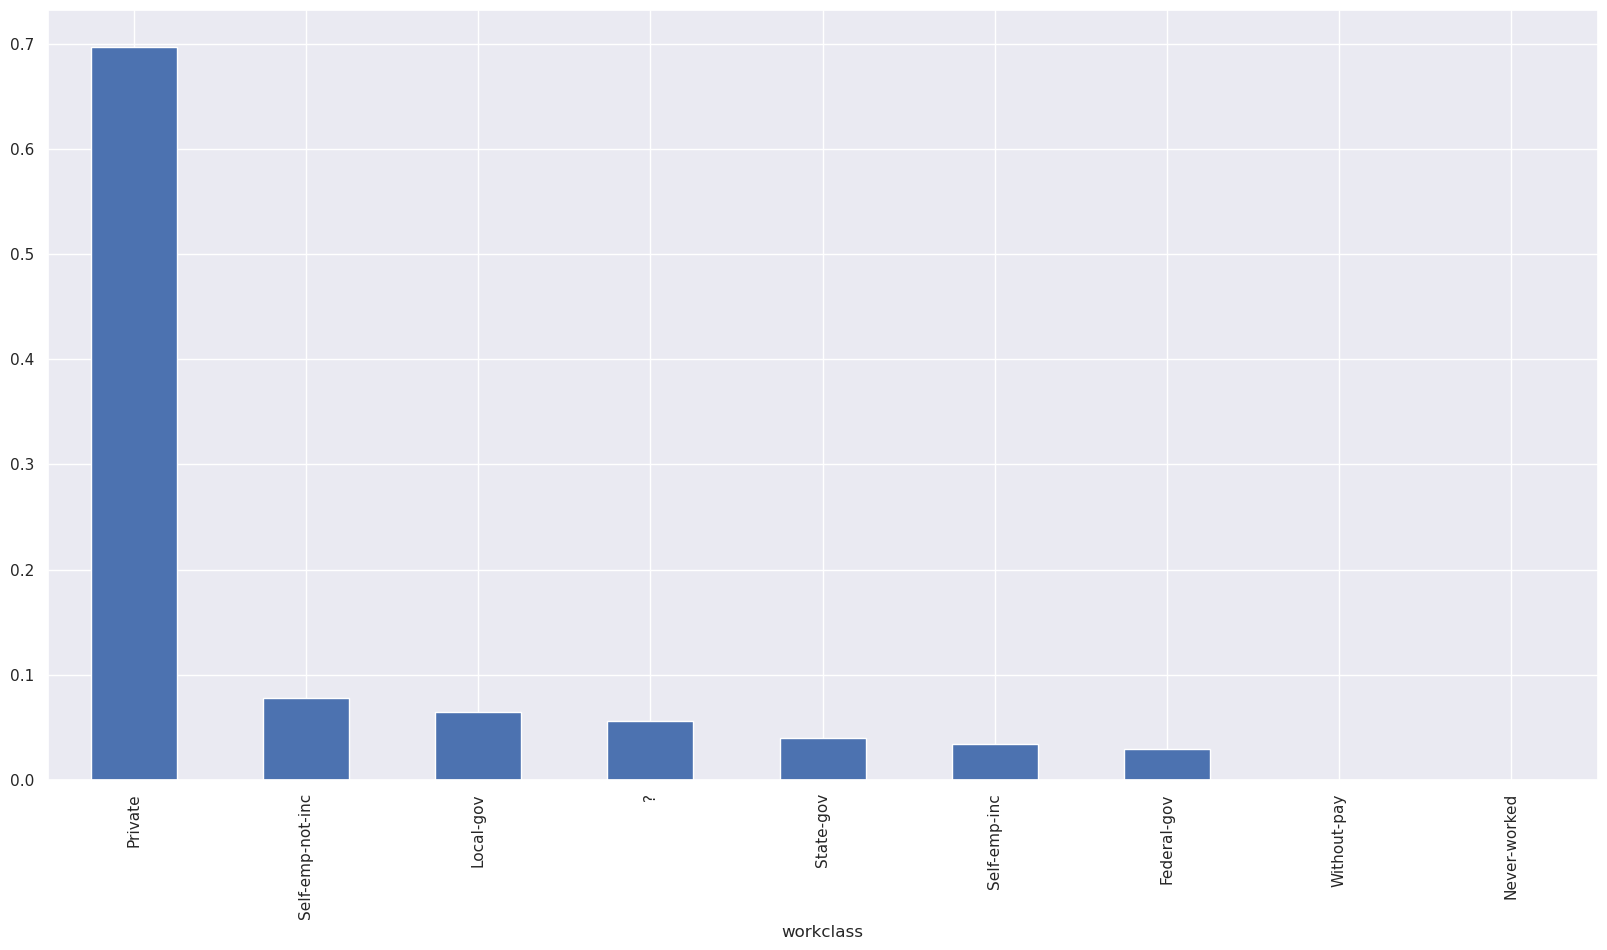

In [6]:
plt.figure(figsize=(20,10)) 
df["workclass"].value_counts('normalize').plot(kind='bar');

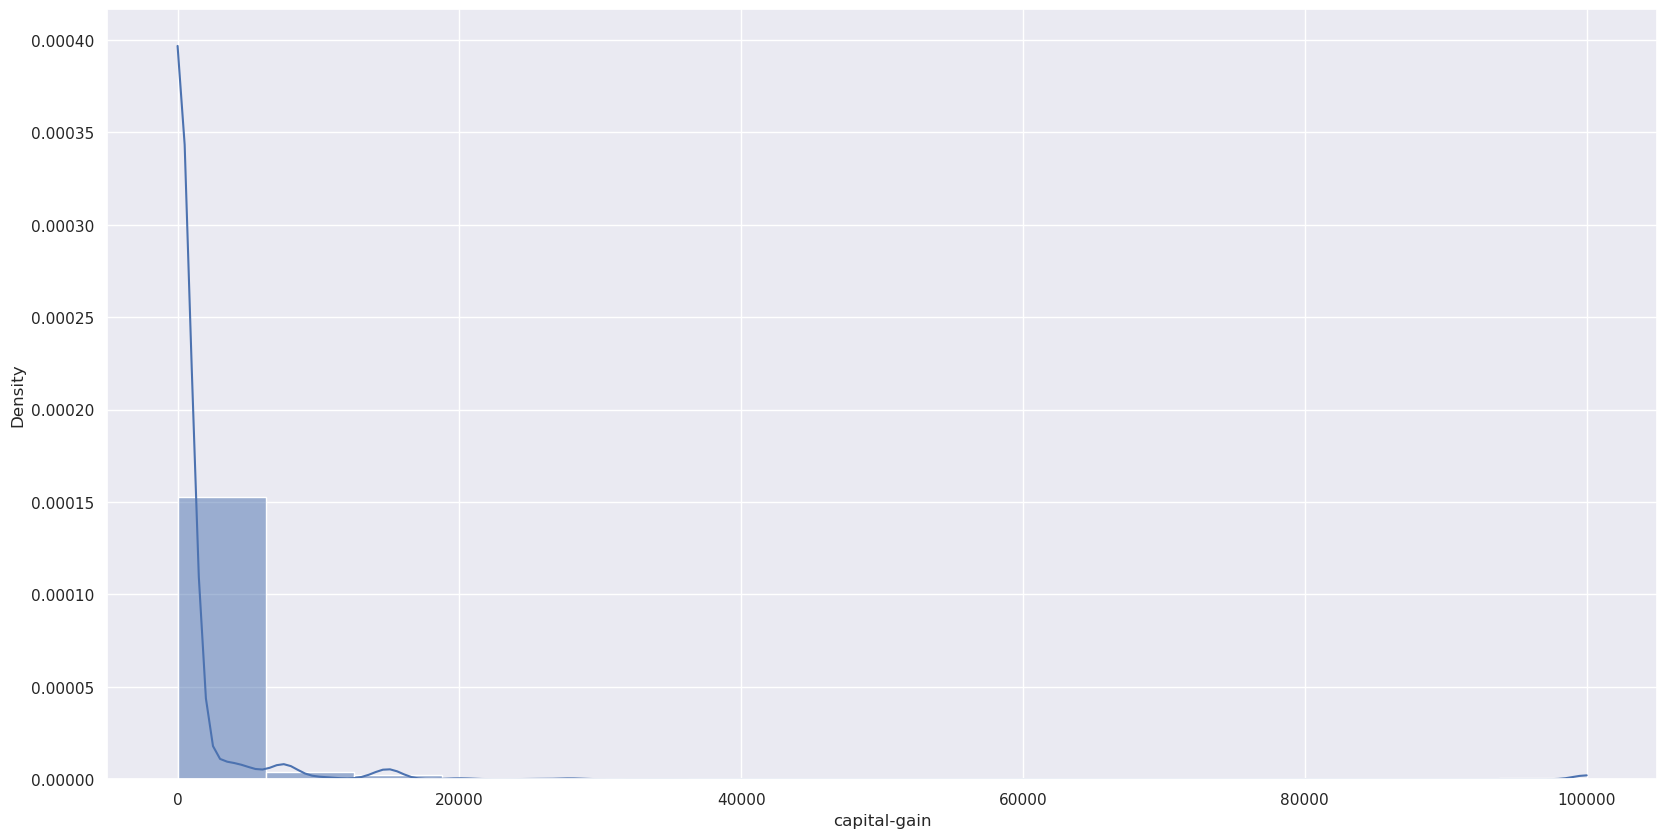

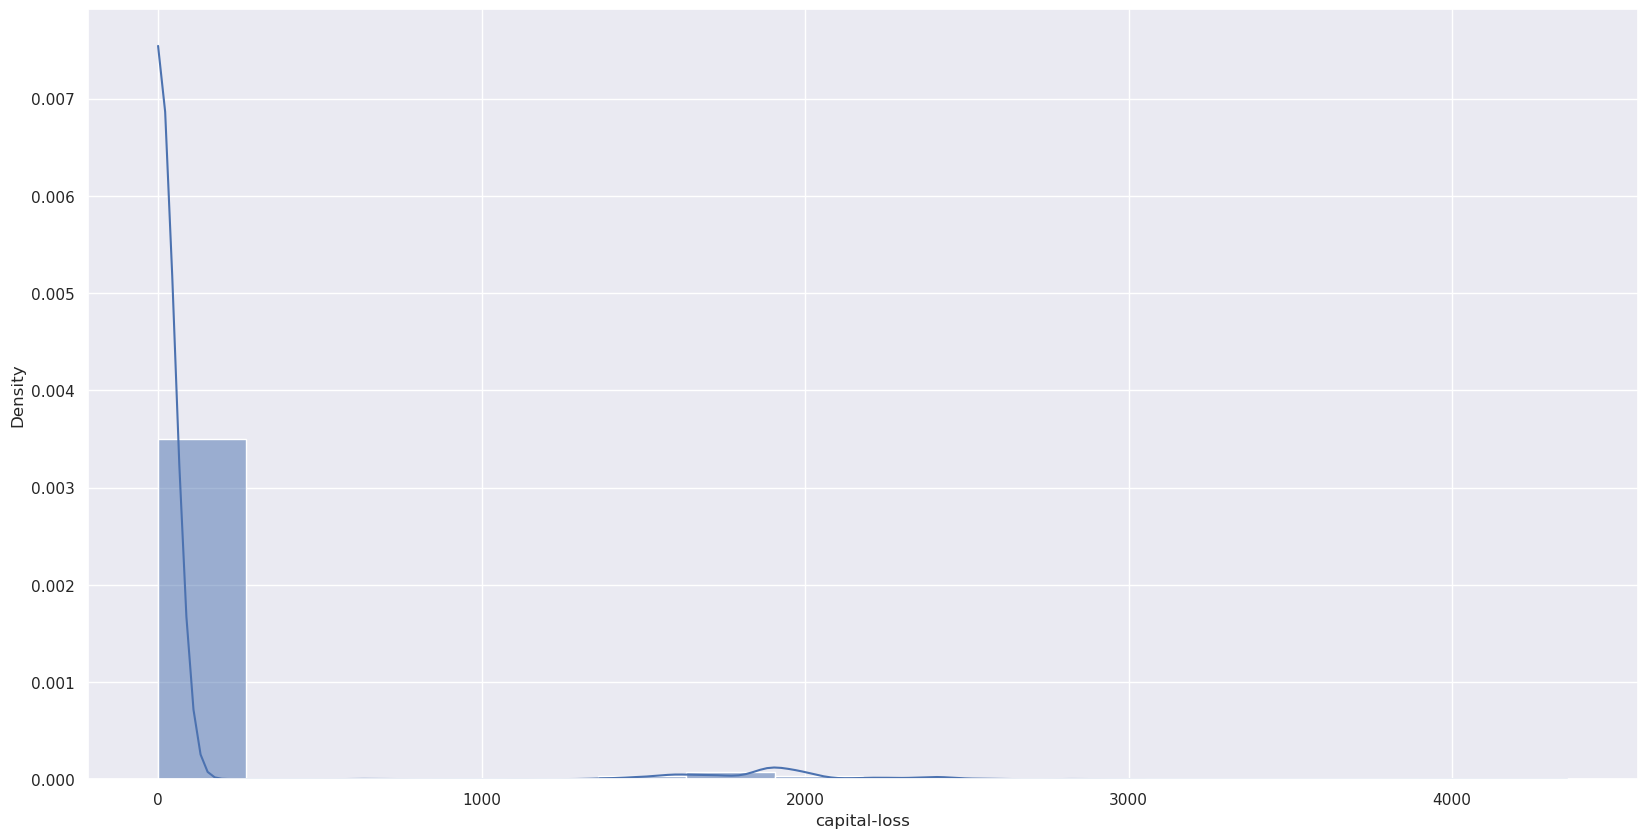

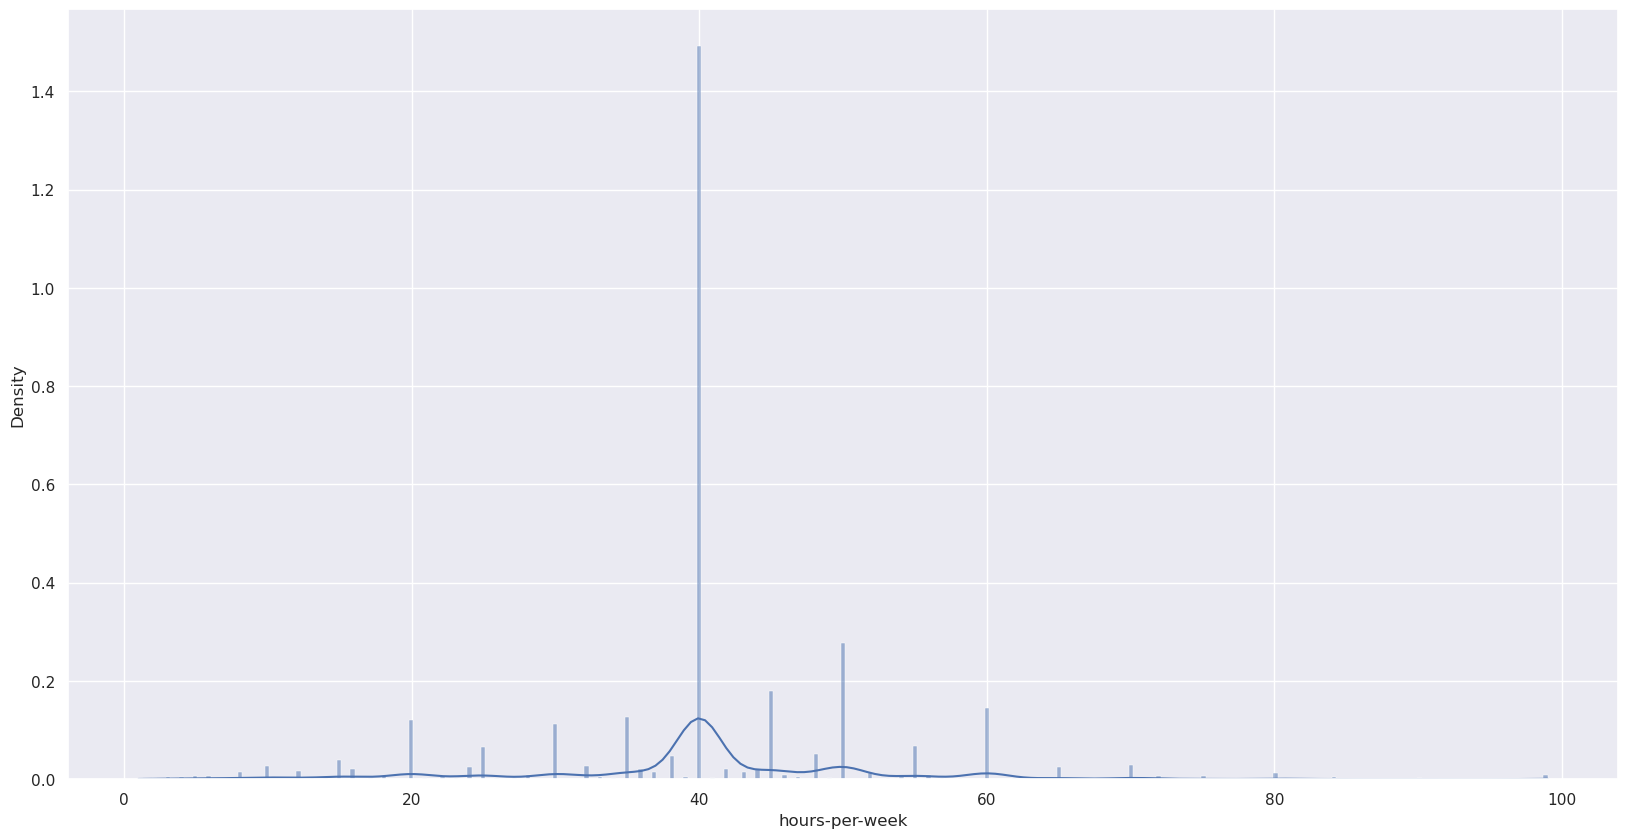

In [7]:
make_num_plot(df, "capital-gain")
make_num_plot(df, "capital-loss")
make_num_plot(df, "hours-per-week")    

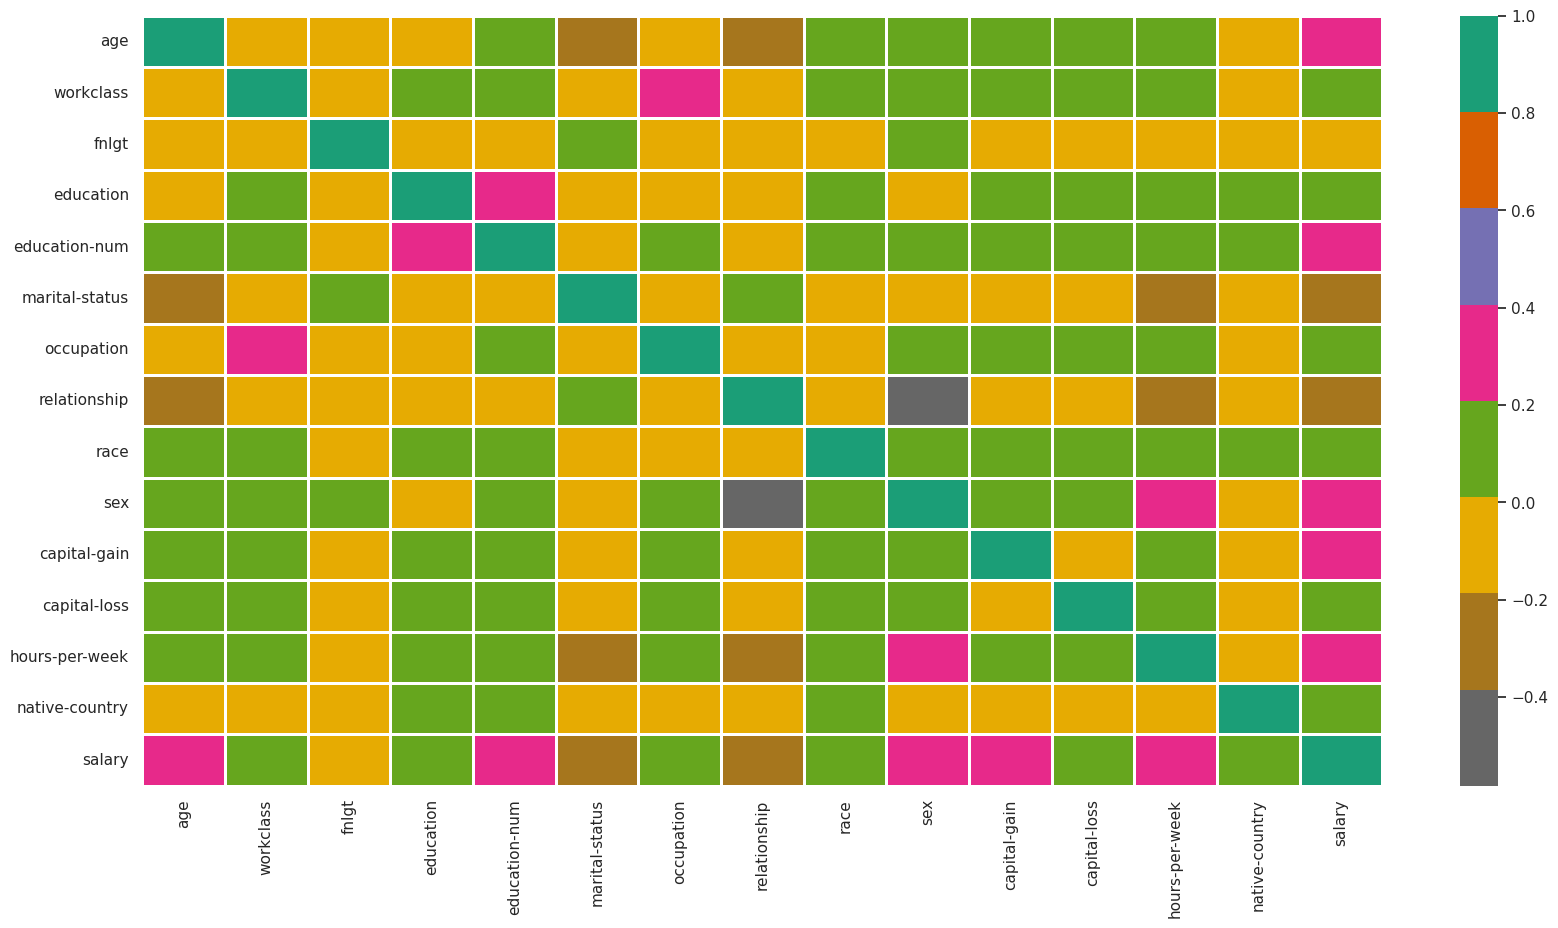

In [8]:
make_correlation_matrix(df)